In [ ]:
#import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys
from sklearn.metrics import accuracy_score, roc_auc_score, make_scorer

In [ ]:
#import data
pharma_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Training_set_begs.csv')
pharma_data.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,22374,8,3333,DX6,56,18.479385,YES,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,18164,5,5740,DX2,36,22.945566,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,6283,23,10446,DX6,48,27.510027,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,5339,51,12011,DX1,5,19.130976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,33012,0,12513,NaN,128,1.348400,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1


In [ ]:
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Testing_set_begs.csv')
test_data.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond
0,19150,40,3709,DX3,16,29.443894,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
1,23216,52,986,DX6,24,26.836321,NO,URBAN,Stable,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
2,11890,50,11821,DX4 DX5,63,25.523280,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
3,7149,32,3292,DX6,42,27.171155,NO,URBAN,Stable,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0
4,22845,20,9959,DX3,50,25.556192,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
pharma_data.dtypes

ID_Patient_Care_Situation      int64
Diagnosed_Condition            int64
Patient_ID                     int64
Treated_with_drugs            object
Patient_Age                    int64
Patient_Body_Mass_Index      float64
Patient_Smoker                object
Patient_Rural_Urban           object
Patient_mental_condition      object
A                            float64
B                            float64
C                            float64
D                            float64
E                            float64
F                            float64
Z                            float64
Number_of_prev_cond          float64
Survived_1_year                int64
dtype: object

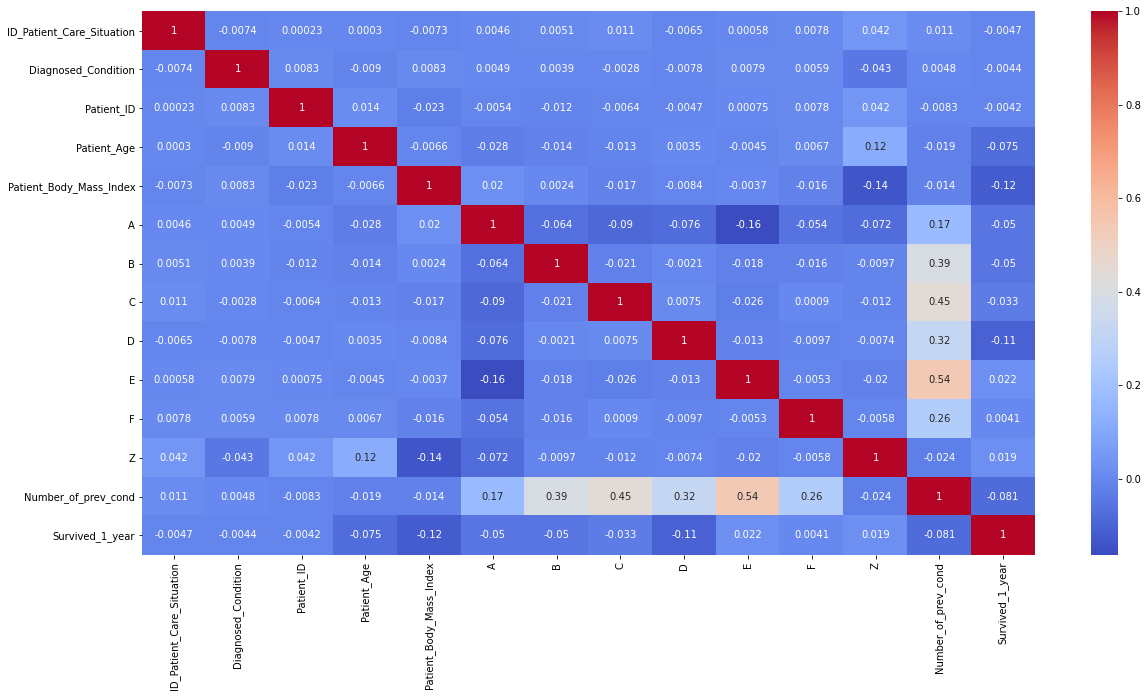

In [ ]:
#to see which variable has more correlation 
plt.figure(figsize=(20,10))
sns.heatmap(pharma_data.corr(),cmap='coolwarm', annot=True)
plt.show()

In [ ]:
pharma_data.isnull().sum()

ID_Patient_Care_Situation       0
Diagnosed_Condition             0
Patient_ID                      0
Treated_with_drugs             13
Patient_Age                     0
Patient_Body_Mass_Index         0
Patient_Smoker                  0
Patient_Rural_Urban             0
Patient_mental_condition        0
A                            1235
B                            1235
C                            1235
D                            1235
E                            1235
F                            1235
Z                            1235
Number_of_prev_cond          1235
Survived_1_year                 0
dtype: int64

In [ ]:
test_data.isnull().sum()

ID_Patient_Care_Situation    0
Diagnosed_Condition          0
Patient_ID                   0
Treated_with_drugs           0
Patient_Age                  0
Patient_Body_Mass_Index      0
Patient_Smoker               0
Patient_Rural_Urban          0
Patient_mental_condition     0
A                            0
B                            0
C                            0
D                            0
E                            0
F                            0
Z                            0
Number_of_prev_cond          0
dtype: int64

In [ ]:
def inititial_eda_checks(df):
    '''
    Takes df
    Checks nulls
    '''
    if df.isnull().sum().sum() > 0:
        mask_total = df.isnull().sum().sort_values(ascending=False) 
        total = mask_total[mask_total > 0]

        mask_percent = df.isnull().mean().sort_values(ascending=False) 
        percent = mask_percent[mask_percent > 0] 

        missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    
        print(f'Total and Percentage of NaN:\n {missing_data}')
    else: 
        print('No NaN found.')

In [ ]:
inititial_eda_checks(pharma_data)

Total and Percentage of NaN:
                      Total   Percent
Z                     1235  0.053470
F                     1235  0.053470
E                     1235  0.053470
D                     1235  0.053470
C                     1235  0.053470
B                     1235  0.053470
A                     1235  0.053470
Number_of_prev_cond   1235  0.053470
Treated_with_drugs      13  0.000563


In [ ]:
inititial_eda_checks(test_data)

No NaN found.


In [ ]:
pharma_data.replace('', np.nan, inplace=True)

In [ ]:
from sklearn.impute import SimpleImputer 
def impute_missing_values(dataset_type,missing_columns):
    imputer=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
    for i in missing_columns:
        imputer=imputer.fit(dataset_type[[i]])
        dataset_type[i]=imputer.transform(dataset_type[[i]])

In [ ]:
mis_col_names=['Z','F','E','D','C','B','A','Number_of_prev_cond']

In [ ]:
impute_missing_values(pharma_data,mis_col_names)

In [ ]:
from sklearn.impute import SimpleImputer 
def impute_missing_values_categorical(dataset_type,missing_columns):
    imputer=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
    for i in missing_columns:
        imputer=imputer.fit(dataset_type[[i]])
        dataset_type[i]=imputer.transform(dataset_type[[i]])

In [ ]:
cat_mis_columns=['Treated_with_drugs']

In [ ]:
impute_missing_values_categorical(pharma_data,cat_mis_columns)

In [ ]:
inititial_eda_checks(pharma_data)

No NaN found.


In [ ]:
pharma_data.columns

Index(['ID_Patient_Care_Situation', 'Diagnosed_Condition', 'Patient_ID',
       'Treated_with_drugs', 'Patient_Age', 'Patient_Body_Mass_Index',
       'Patient_Smoker', 'Patient_Rural_Urban', 'Patient_mental_condition',
       'A', 'B', 'C', 'D', 'E', 'F', 'Z', 'Number_of_prev_cond',
       'Survived_1_year'],
      dtype='object')

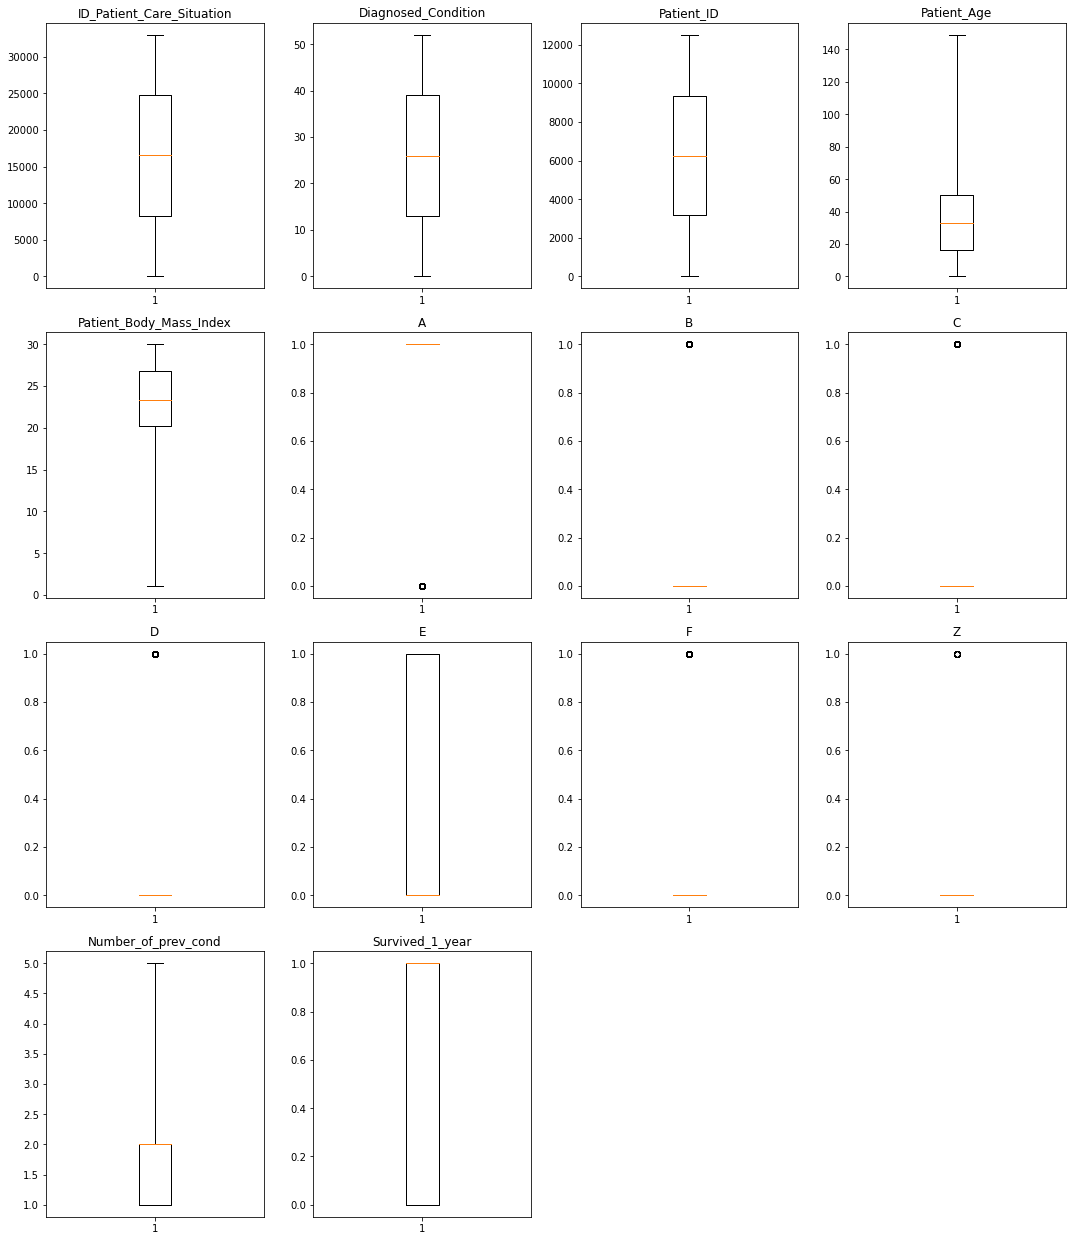

In [ ]:
continuous_labels = list(['ID_Patient_Care_Situation', 'Diagnosed_Condition', 'Patient_ID',
       'Patient_Age', 'Patient_Body_Mass_Index',
       'A', 'B', 'C', 'D', 'E', 'F', 'Z', 'Number_of_prev_cond',
       'Survived_1_year'])
i = 1
plt.figure(figsize=(15,30))
for var in continuous_labels: #plotting boxplot for each variable
    plt.subplot(round(len(continuous_labels),0)/3+3,4,i)
    plt.boxplot(pharma_data[var],whis=5)
    plt.title(var)
    i+=1
plt.tight_layout()
plt.show()


In [ ]:
pharma_data = pharma_data.drop(['Patient_mental_condition'],axis=1)

In [ ]:
test_data = test_data.drop(['Patient_mental_condition'],axis=1)

In [ ]:
pharma_data = pd.get_dummies(pharma_data)

In [ ]:
pharma_data.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Patient_Age,Patient_Body_Mass_Index,A,B,C,D,E,...,Treated_with_drugs_DX3 DX5,Treated_with_drugs_DX4,Treated_with_drugs_DX4 DX5,Treated_with_drugs_DX5,Treated_with_drugs_DX6,Patient_Smoker_Cannot say,Patient_Smoker_NO,Patient_Smoker_YES,Patient_Rural_Urban_RURAL,Patient_Rural_Urban_URBAN
0,22374,8,3333,56,18.479385,1.0,0.0,0.0,0.0,1.0,...,0,0,0,0,1,0,0,1,0,1
1,18164,5,5740,36,22.945566,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,1,0
2,6283,23,10446,48,27.510027,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,1,1,0
3,5339,51,12011,5,19.130976,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,1
4,33012,0,12513,128,1.348400,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,1,0,0,1,0


In [ ]:
pharma_data.columns

Index(['ID_Patient_Care_Situation', 'Diagnosed_Condition', 'Patient_ID',
       'Patient_Age', 'Patient_Body_Mass_Index', 'A', 'B', 'C', 'D', 'E', 'F',
       'Z', 'Number_of_prev_cond', 'Survived_1_year',
       'Treated_with_drugs_DX1 ', 'Treated_with_drugs_DX1 DX2 ',
       'Treated_with_drugs_DX1 DX2 DX3 ',
       'Treated_with_drugs_DX1 DX2 DX3 DX4 ',
       'Treated_with_drugs_DX1 DX2 DX3 DX4 DX5 ',
       'Treated_with_drugs_DX1 DX2 DX3 DX5 ',
       'Treated_with_drugs_DX1 DX2 DX4 ',
       'Treated_with_drugs_DX1 DX2 DX4 DX5 ',
       'Treated_with_drugs_DX1 DX2 DX5 ', 'Treated_with_drugs_DX1 DX3 ',
       'Treated_with_drugs_DX1 DX3 DX4 ',
       'Treated_with_drugs_DX1 DX3 DX4 DX5 ',
       'Treated_with_drugs_DX1 DX3 DX5 ', 'Treated_with_drugs_DX1 DX4 ',
       'Treated_with_drugs_DX1 DX4 DX5 ', 'Treated_with_drugs_DX1 DX5 ',
       'Treated_with_drugs_DX2 ', 'Treated_with_drugs_DX2 DX3 ',
       'Treated_with_drugs_DX2 DX3 DX4 ',
       'Treated_with_drugs_DX2 DX3 DX4 DX5 

In [ ]:
test_data = pd.get_dummies(test_data)

In [ ]:
test_data.columns

Index(['ID_Patient_Care_Situation', 'Diagnosed_Condition', 'Patient_ID',
       'Patient_Age', 'Patient_Body_Mass_Index', 'A', 'B', 'C', 'D', 'E', 'F',
       'Z', 'Number_of_prev_cond', 'Treated_with_drugs_DX1 ',
       'Treated_with_drugs_DX1 DX2 ', 'Treated_with_drugs_DX1 DX2 DX3 ',
       'Treated_with_drugs_DX1 DX2 DX3 DX4 ',
       'Treated_with_drugs_DX1 DX2 DX3 DX4 DX5 ',
       'Treated_with_drugs_DX1 DX2 DX3 DX5 ',
       'Treated_with_drugs_DX1 DX2 DX4 ',
       'Treated_with_drugs_DX1 DX2 DX4 DX5 ',
       'Treated_with_drugs_DX1 DX2 DX5 ', 'Treated_with_drugs_DX1 DX3 ',
       'Treated_with_drugs_DX1 DX3 DX4 ',
       'Treated_with_drugs_DX1 DX3 DX4 DX5 ',
       'Treated_with_drugs_DX1 DX3 DX5 ', 'Treated_with_drugs_DX1 DX4 ',
       'Treated_with_drugs_DX1 DX4 DX5 ', 'Treated_with_drugs_DX1 DX5 ',
       'Treated_with_drugs_DX2 ', 'Treated_with_drugs_DX2 DX3 ',
       'Treated_with_drugs_DX2 DX3 DX4 ',
       'Treated_with_drugs_DX2 DX3 DX4 DX5 ',
       'Treated_with_dr

In [ ]:
pharma_data = pharma_data.drop(['ID_Patient_Care_Situation','Patient_ID'],axis=1)

In [ ]:
test_data = test_data.drop(['ID_Patient_Care_Situation','Patient_ID'],axis=1)

In [ ]:
pharma_data = pharma_data.drop(['Patient_Smoker_Cannot say'],axis=1)

In [ ]:
pharma_data.head()

,Diagnosed_Condition,Patient_Age,Patient_Body_Mass_Index,A,B,C,D,E,F,Z,...,Treated_with_drugs_DX3 DX4 DX5,Treated_with_drugs_DX3 DX5,Treated_with_drugs_DX4,Treated_with_drugs_DX4 DX5,Treated_with_drugs_DX5,Treated_with_drugs_DX6,Patient_Smoker_NO,Patient_Smoker_YES,Patient_Rural_Urban_RURAL,Patient_Rural_Urban_URBAN
0,8,56,18.479385,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,1,0,1,0,1
1,5,36,22.945566,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,1,0
2,23,48,27.510027,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,1,1,0
3,51,5,19.130976,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,1
4,0,128,1.348400,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,1,0,0,1,0


In [ ]:
test_data.head()

,Diagnosed_Condition,Patient_Age,Patient_Body_Mass_Index,A,B,C,D,E,F,Z,...,Treated_with_drugs_DX3 DX4 DX5,Treated_with_drugs_DX3 DX5,Treated_with_drugs_DX4,Treated_with_drugs_DX4 DX5,Treated_with_drugs_DX5,Treated_with_drugs_DX6,Patient_Smoker_NO,Patient_Smoker_YES,Patient_Rural_Urban_RURAL,Patient_Rural_Urban_URBAN
0,40,16,29.443894,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,1,0,1,0
1,52,24,26.836321,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,1,0,0,1
2,50,63,25.523280,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,0,0,1,0,0,1,0,1,0
3,32,42,27.171155,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,1,1,0,0,1
4,20,50,25.556192,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,1,0


In [ ]:
X = pharma_data.drop(['Survived_1_year'],axis=1)
y = pharma_data['Survived_1_year']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [ ]:
from sklearn import linear_model
clf = linear_model.LogisticRegression(max_iter=2000)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("True Positive", tp)
print("True Negative", tn)
print("False Positive", fp)
print("False Negative", fn)

In [ ]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
acc

In [ ]:
prediction = clf.predict(test_data)

In [ ]:
prediction

In [ ]:
np.set_printoptions(threshold=sys.maxsize)

In [ ]:
prediction

In [ ]:
#use Random forest classifier
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("True Positive", tp)
print("True Negative", tn)
print("False Positive", fp)
print("False Negative", fn)

True Positive 4201
True Negative 1970
False Positive 833
False Negative 619


In [ ]:
acc = accuracy_score(y_test, y_pred)
acc

0.8095238095238095

In [ ]:
prediction = clf.predict(test_data)

In [ ]:
prediction

array([1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,

In [ ]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(clf,X, y, cv=10, scoring=["accuracy", "precision", "recall"])
cv_results

{'fit_time': array([ 6.85607719,  5.72572184,  7.52069545,  8.59615564, 10.60202217,
         6.27374768,  6.55261564,  6.06552815,  6.30438972,  6.39960146]),
 'score_time': array([0.17290163, 0.17290139, 0.4797256 , 0.22787261, 0.21887493,
        0.15191245, 0.18289542, 0.14791703, 0.14891481, 0.18789291]),
 'test_accuracy': array([0.81428571, 0.82077922, 0.80952381, 0.80562771, 0.7995671 ,
        0.81861472, 0.81515152, 0.80381117, 0.8137722 , 0.82330013]),
 'test_precision': array([0.83670803, 0.84227749, 0.83641161, 0.83234714, 0.82402597,
        0.85013441, 0.84651475, 0.82758621, 0.83528646, 0.84469201]),
 'test_recall': array([0.87739726, 0.88150685, 0.86849315, 0.86712329, 0.86858316,
        0.86584531, 0.86447639, 0.87123288, 0.87876712, 0.88287671])}

In [ ]:
# Defined a custom function for implementing hyper parameter tuning
from sklearn.model_selection import GridSearchCV
def gridfunc(classifier, parameter, X_train, y_train):
        
    clf = classifier
    np.random.seed(9)
    parameters = parameter
    acc_scorer = make_scorer(accuracy_score)
    
    # Run the grid search
    grid_obj = GridSearchCV(clf, parameters, scoring=acc_scorer, return_train_score=True)
    grid_obj = grid_obj.fit(X_train, y_train) 
    
    return grid_obj

In [ ]:
#function for plotting mean scores for a particular grid object

def hp_cv_scores(grid_obj):
    grid_obj.cv_results_  #A dictionary with keys as column title and values as columns
    mean_test_scores = grid_obj.cv_results_['mean_test_score'] #Adding 'mean_test_score' as a key
    mean_train_scores = grid_obj.cv_results_['mean_train_score'] #Adding 'mean_train_score' as a key
    
    plt.figure(figsize=(10,6))
    
    # the below lines just fill up the column using the various parameter values we want to try
    all_vals = list(grid_obj.param_grid.values())
    param_values =[str(x) for x in all_vals[0]]
    
    # The below line creates values for ticks on x axis. If there are 2 parameter values to be tried, it'll create 2 ticks
    x = np.arange(1, len(param_values)+1)
     
    plt.plot(x,mean_train_scores, c='r', label='Train set') #Plotting the mean_train_scores in red
    
    plt.xticks(x,param_values)
    
    plt.plot(x,mean_test_scores,c='g', label='Test set') #Plotting the mean_test_scores in red
    plt.xlabel(list(grid_obj.param_grid.keys())[0]) #Label of the column will be the hyperparameter
    plt.ylabel('mean scores')
    plt.legend()
    plt.show()

In [ ]:
classifier = RandomForestClassifier(random_state=9)

In [ ]:
parameter = {'n_estimators': [10,50,100], 
              'max_features': ['log2', 'sqrt'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2,4,6], 
             }

In [ ]:
#task find the results for the given params
grid = gridfunc(classifier, parameter, x_train, y_train)

In [ ]:
# Set the clf to the best combination of parameters
clf = grid.best_estimator_
    
# Fit the best algorithm to the data. 
clf.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=6, max_features='sqrt',
                       random_state=9)

In [ ]:
grid.best_score_

0.7751709755605983

In [ ]:
clf=RandomForestClassifier(n_estimators=100,criterion='entropy', max_depth=6, max_features='sqrt',
                       random_state=9)
#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)

In [ ]:
prediction = clf.predict(test_data)

In [ ]:
prediction

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,